In [9]:
import scipy.io as scio
import geopandas as gpd
import pyproj
# 第一次运行会报错
pyproj.datadir.set_data_dir('E:\\Anaconda\\envs\\myenv5\\Library\\share\\proj') ## set the pyproj data directory
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
import cartopy.feature as cf
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from osgeo import gdal
import matplotlib as mpl
import palettable
print('done')

done


In [10]:
def plot_tif(file_path): # 获取栅格数据data，xy坐标
    # 打开TIF文件
    dataset = gdal.Open(file_path)

    if dataset is None:
        print("无法打开文件: " + file_path)
        return

    # 读取TIF文件的数据
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray()
    # print(data)

    # 获取地理参考信息
    geotransform = dataset.GetGeoTransform()
    x_origin = geotransform[0]
    y_origin = geotransform[3]
    pixel_width = geotransform[1]
    pixel_height = geotransform[5]
    x_size = dataset.RasterXSize
    y_size = dataset.RasterYSize

    # 生成X和Y坐标
    x_coords = np.linspace(x_origin, x_origin + x_size * pixel_width, x_size + 1)
    y_coords = np.linspace(y_origin, y_origin + y_size * pixel_height, y_size + 1)
    return data, x_coords, y_coords

def get_max_min(file_path1, file_path2):  # 计算两栅格最值
#   print(file_path1, '/n', file_path2)
    data1, x, y = plot_tif(file_path1)
    data2, x, y = plot_tif(file_path2)
    
    # 计算两个数据数组的最大值和最小值（忽略nan）
    max_value = max(np.nanmax(data1), np.nanmax(data2))
    min_value = min(np.nanmin(data1), np.nanmin(data2))
    return max_value, min_value

In [11]:
# 打开矢量文件
cb_shp = gpd.read_file(r'E:\python1\jupyter\code(2)\Raw_data\Raw_data\shape_file\Cornbelt_shp\cornbelt_line.shp')
an_shp = gpd.read_file(r'E:\python1\jupyter\code(2)\Raw_data\Raw_data\shape_file\AmazonShp\AmazonShp\amazonia_line.shp')

regions = ['cornbelt','amazon']
EVs = ['NDVI_type_C','new_kNDVI_type_C','NIRv_type_C','EVI2_type_C','LAI']
file_paths = []

for region in regions:
    for ev in EVs:
        file_path =  r'E:\python1\jupyter\code(2)\5.6data\averg\\avg_{}_{}.tif'.format(ev,region)
        print(file_path)
        file_paths.append(file_path)

VIs = ['NDVI','kNDVI','NIRv','EVI2','LAI']

# 经纬度刻度
xticks_cb = [-100, -90]
xticks_an = [-70, -60, -50]
yticks_cb = [40, 45]
yticks_an = [-15, -5, 5]

# 边界颜色
shp_color = 'black'

max_mins = []  # 最值
n= 1
while n <= 5:
    #print(file_paths[n-1],'\n',file_paths[n+4])
    v_max, v_min = get_max_min(file_paths[n-1],file_paths[n+4])
    print(VIs[n-1],v_max, v_min)
    max_mins.append([v_max, v_min])
    n += 1
print(max_mins)


maxs = [0.9, 0.66, 0.42, 0.75, 6.45]

lev_all = {
           '1':[0,0.3,0.6,0.9],  #EVI2 0.7129686 0.3463191
           '2':[0,0.22,0.44,0.66],  #NIRv 0.41401958 0.16013275
           '3':[0,0.21,0.42],  #kNDVI 0.6585861 0.39941633
           '4':[0,0.25,0.50,0.75],  #NDVI 0.8894477 0.6289281
           '5':[0,2,4,6]  #LAI 6.45 1.541935
          }
for k in [6,7,8,9,10]:
    print(k,lev_all[str(k-5)],max(lev_all[str(k-5)]))

E:\python1\jupyter\code(2)\5.6data\averg\\avg_NDVI_type_C_cornbelt.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_new_kNDVI_type_C_cornbelt.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_NIRv_type_C_cornbelt.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_EVI2_type_C_cornbelt.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_LAI_cornbelt.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_NDVI_type_C_amazon.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_new_kNDVI_type_C_amazon.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_NIRv_type_C_amazon.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_EVI2_type_C_amazon.tif
E:\python1\jupyter\code(2)\5.6data\averg\\avg_LAI_amazon.tif
NDVI 0.8894477 0.6289281
kNDVI 0.658586 0.39715254
NIRv 0.41401958 0.16013275
EVI2 0.7129686 0.3463191
LAI 6.45 1.541935
[[0.8894477, 0.6289281], [0.658586, 0.39715254], [0.41401958, 0.16013275], [0.7129686, 0.3463191], [6.45, 1.541935]]
6 [0, 0.3, 0.6, 0.9] 0.9
7 [0, 0.22, 0.44, 0.66] 0.66
8 [0, 0.21, 0.

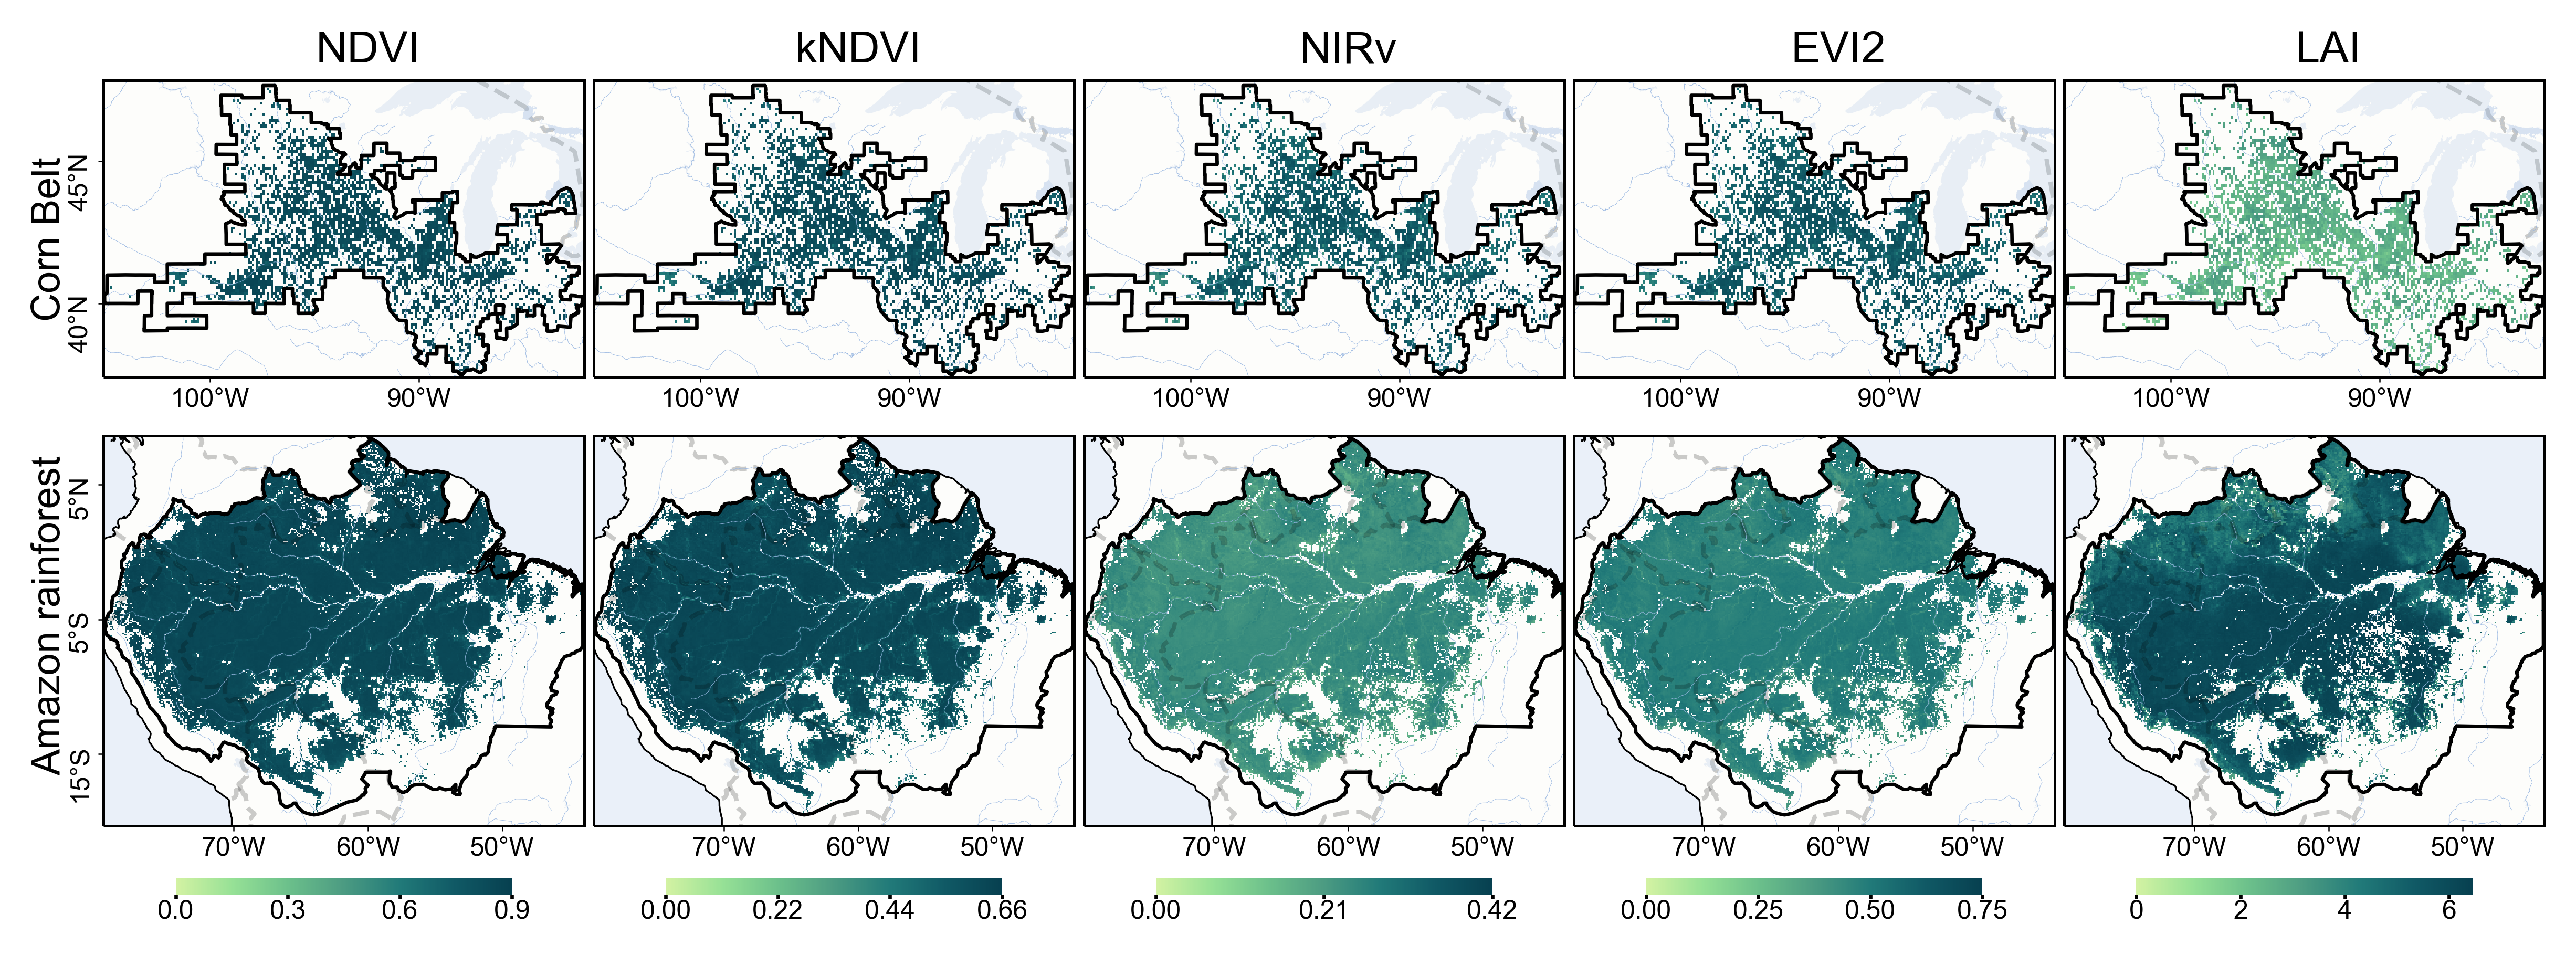

In [12]:

# 创建图形对象
fig = plt.figure(figsize = (10,4),dpi = 600)

# 设置子图间距
plt.subplots_adjust(wspace =0.02,hspace =-0.18)

# 更新matplotlib 的全局参数，将字体样式设置为 Arial
config = {"font.family":'Arial'}
plt.rcParams.update(config)

# 设置颜色
cmap = palettable.cartocolors.sequential.Emrld_7.mpl_colormap
# cmap = matplotlib.colors.ListedColormap(palettable.cartocolors.sequential.Emrld_7.mpl_colors)

# 反转颜色映射
# cmap = cmap.reversed()

colorset = cmap


k = 1
while k <= 10:
    # 添加子图
    ax = fig.add_subplot(2,5,k,projection = ccrs.PlateCarree())
    # 获取栅格数据data，xy坐标
    data, x_coords, y_coords = plot_tif(file_paths[k-1])
    if 0< k <= 5: #cornbelt
        # 添加图像元素
        ax.set_extent([x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
        ax.add_feature(cf.LAND,alpha=0.1)
        ax.add_feature(cf.BORDERS, linestyle='--',alpha=0.2)
        ax.add_feature(cf.LAKES, alpha=0.2)
        ax.add_feature(cf.OCEAN,alpha=0.2)
        ax.add_feature(cf.COASTLINE,lw=0.4)
        ax.add_feature(cf.RIVERS,lw=0.1)
        # ax.add_feature(states_provinces,lw=0.2,edgecolor='gray') 
        if k == 1:
            # 左边写个cornbelt
            ax.text(-0.15,0.215,'Corn Belt',transform=ax.transAxes,fontsize = 9,fontweight = 'normal',rotation= 90)
            # 使用具体的刻度列表
            ax.set_xticks(xticks_cb)  # 或者 xticks_an，具体取决于您要设置的刻度
            ax.set_yticks(yticks_cb)  # 或者 yticks_an，具体取决于您要设置的刻度
            ax.set_yticklabels([x.get_text() for x in ax.get_yticklabels()],rotation=90)
            ax.xaxis.set_major_formatter(LongitudeFormatter())                    
            ax.yaxis.set_major_formatter(LatitudeFormatter()) 
            ax.tick_params(axis='both',which='major',labelsize=6,direction='out',length=1.2,width=0.3,pad=1.3,bottom=True, left=True,top=False,right=False)
            ax.spines['geo'].set_linewidth(0.6)
        else:
            # 仅x刻度
            ax.set_xticks(xticks_cb)  # 或者 xticks_an，具体取决于您要设置的刻度
            ax.xaxis.set_major_formatter(LongitudeFormatter())                    
            ax.tick_params(axis='both',which='major',labelsize=6,direction='out',length=1.2,width=0.3,pad=1.3,bottom=True, left=True,top=False,right=False)
            ax.spines['geo'].set_linewidth(0.6)
        # 画栅格
        p = ax.pcolormesh(x_coords,y_coords,data,transform=ccrs.PlateCarree(),cmap=colorset, vmax=maxs[k-1], vmin=0)

        # 画矢量图
        cb_shp.plot(ax = ax,transform=ccrs.PlateCarree(),color = shp_color,edgecolor="k",lw = 0.8)
        # 列标题
        # ax.text(0.4,1.03, VIs[k-1], transform=ax.transAxes, fontsize = 10)
        ax.text(0.55, 1.1, VIs[k-1], transform=ax.transAxes, fontsize=10, horizontalalignment='center', verticalalignment='center')

        
    elif 5< k <= 10: 
        ax.set_extent([x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
        ax.add_feature(cf.LAND,alpha=0.1)
        ax.add_feature(cf.BORDERS, linestyle='--',alpha=0.2)
        ax.add_feature(cf.LAKES, alpha=0.2)
        ax.add_feature(cf.OCEAN,alpha=0.2)
        ax.add_feature(cf.COASTLINE,lw=0.4)
        ax.add_feature(cf.RIVERS,lw=0.1)
        # ax.add_feature(states_provinces,lw=0.2,edgecolor='gray') 
        if k == 6:
            # 左边写个amazon
            ax.text(-0.15,0.15,'Amazon rainforest',transform=ax.transAxes,fontsize = 9,fontweight = 'normal',rotation= 90)
            # 使用具体的刻度列表
            ax.set_xticks(xticks_an)  # 或者 xticks_an，具体取决于您要设置的刻度
            ax.set_yticks(yticks_an)  # 或者 yticks_an，具体取决于您要设置的刻度
            ax.set_yticklabels([x.get_text() for x in ax.get_yticklabels()],rotation=90)
            ax.xaxis.set_major_formatter(LongitudeFormatter())                    
            ax.yaxis.set_major_formatter(LatitudeFormatter()) 
            ax.tick_params(axis='both',which='major',labelsize=6,direction='out',length=1.2,width=0.3,pad=1.3,bottom=True, left=True,top=False,right=False)
            ax.spines['geo'].set_linewidth(0.6)
        else:
            # 仅x刻度
            ax.set_xticks(xticks_an)  # 或者 xticks_an，具体取决于您要设置的刻度
            ax.xaxis.set_major_formatter(LongitudeFormatter())                    
            ax.tick_params(axis='both',which='major',labelsize=6,direction='out',length=1.2,width=0.3,pad=1.3,bottom=True, left=True,top=False,right=False)
            ax.spines['geo'].set_linewidth(0.6)
        # 画栅格
        p = ax.pcolormesh(x_coords,y_coords,data,transform=ccrs.PlateCarree(),cmap=colorset, vmax=maxs[k-6], vmin=0)
        # 添加色带
        cax, kw = mpl.colorbar.make_axes(ax, location='bottom', pad=0.05, shrink=0.7,anchor = (0.5,0.6))
#         cbar = plt.colorbar(p, cax=cax, orientation='horizontal',ticks=lev)
        cbar = plt.colorbar(p, cax=cax, orientation='horizontal', ticks=lev_all[str(k-5)])
        cbar.outline.set_visible(False)
        cbar.ax.tick_params(labelsize=6,pad = 0.1,length=1)
        # 画矢量图
        an_shp.plot(ax = ax,transform=ccrs.PlateCarree(),color = shp_color,edgecolor="k",lw = 0.8)
    k += 1